In [1]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
from models.feature import create_features
from models.random_forest import random_forest_session
from models.logistic_regression import logistic_regression_session
from models.random_forest import run_backtest
notebook_path = os.path.abspath(os.path.join(os.getcwd(), '../notebooks'))
input_file_path = rf'{notebook_path}\data\processed\session\timestamp_data\renko'
model_output_filepath = rf'{notebook_path}\output\model\random_forest'

 **Trading session/sub-session times (NYC time):**

- asian: 19:00 (prev day) - 04:00
- asian_morning: 19:00 (prev day) - 01:00
- london: 03:00 - 12:00
- london_morning: 03:00 - 07:00
- london_afternoon: 07:00 - 12:00
- ny: 08:00 - 17:00
- ny_morning: 08:00 - 12:00
- ny_evening: 12:00 - 17:00

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 256
{'Accuracy': 0.47653429602888087, 'Confusion Matrix': array([[253,   9],
       [281,  11]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.47      0.97      0.64       262\n           1       0.55      0.04      0.07       292\n\n    accuracy                           0.48       554\n   macro avg       0.51      0.50      0.35       554\nweighted avg       0.51      0.48      0.34       554\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 596
     tick                   datetime  renko_price  actual_open_price  \
0

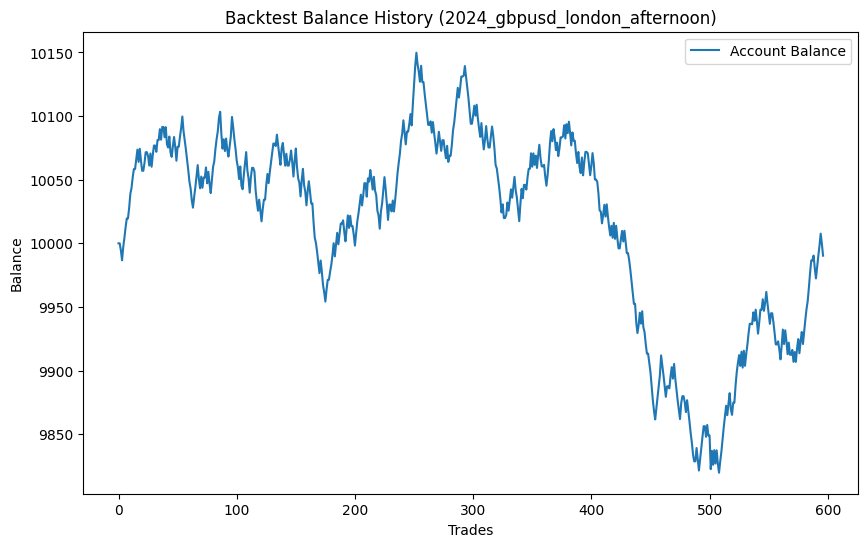

In [2]:
# Step 1: Loading the Data
year = "2024"
ccy = "gbpusd"
session = "london_afternoon"
file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
# Load the dataset
df = pd.read_csv(file_path)
backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 297
{'Accuracy': 0.48172757475083056, 'Confusion Matrix': array([[123,  23],
       [133,  22]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.84      0.61       146\n           1       0.49      0.14      0.22       155\n\n    accuracy                           0.48       301\n   macro avg       0.48      0.49      0.42       301\nweighted avg       0.48      0.48      0.41       301\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 355
     tick                   datetime  renko_price  actual_open_price  \
0

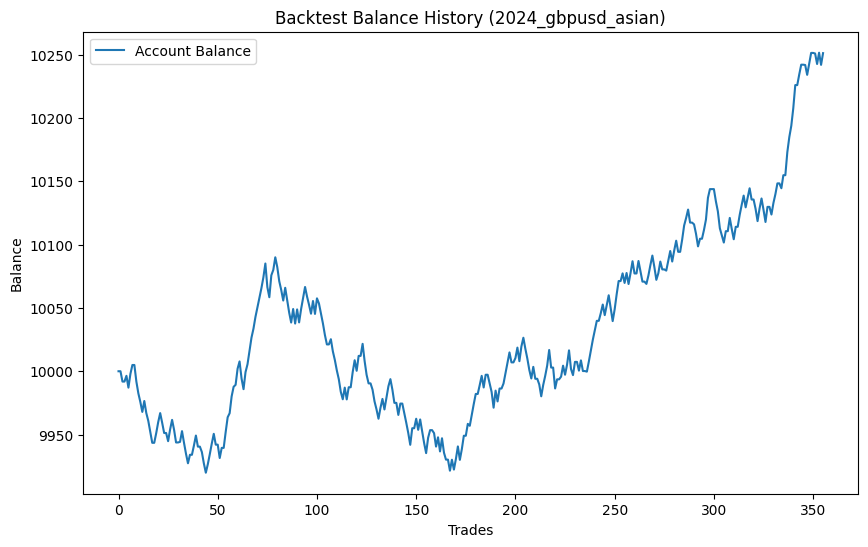

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 281
{'Accuracy': 0.48255813953488375, 'Confusion Matrix': array([[13, 85],
       [ 4, 70]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.76      0.13      0.23        98\n           1       0.45      0.95      0.61        74\n\n    accuracy                           0.48       172\n   macro avg       0.61      0.54      0.42       172\nweighted avg       0.63      0.48      0.39       172\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 299
     tick                   datetime  renko_price  actual_open_price  \
0    

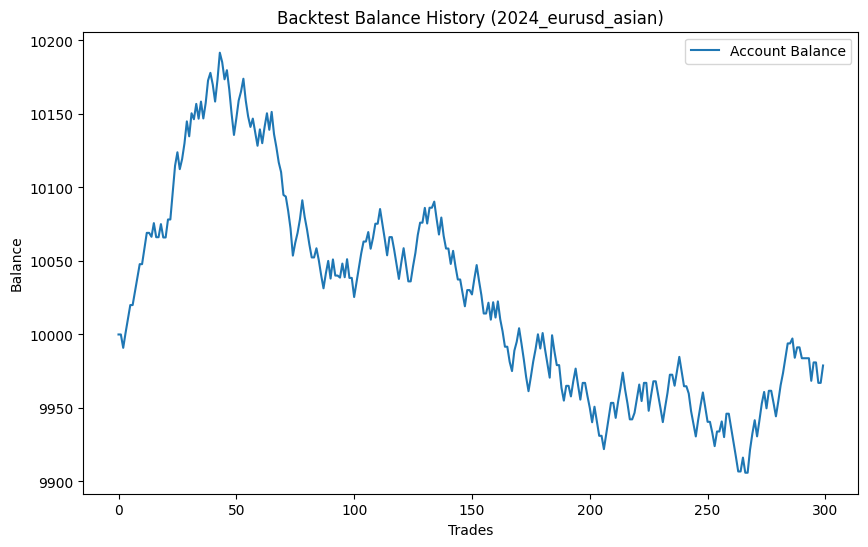

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 288
{'Accuracy': 0.5198329853862212, 'Confusion Matrix': array([[ 65, 171],
       [ 59, 184]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.28      0.36       236\n           1       0.52      0.76      0.62       243\n\n    accuracy                           0.52       479\n   macro avg       0.52      0.52      0.49       479\nweighted avg       0.52      0.52      0.49       479\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 419
     tick                   datetime  renko_price  actual_open_price  \
0 

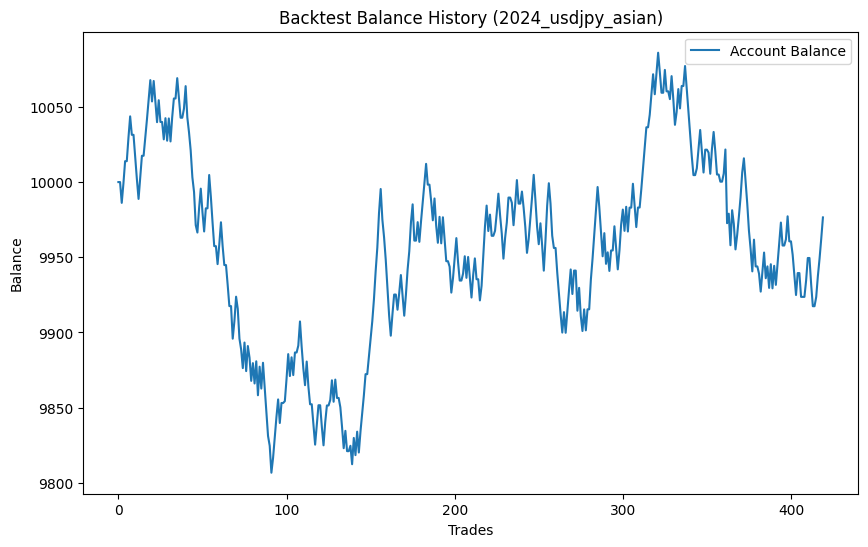

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 204
{'Accuracy': 0.4230769230769231, 'Confusion Matrix': array([[ 1, 45],
       [ 0, 32]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.02      0.04        46\n           1       0.42      1.00      0.59        32\n\n    accuracy                           0.42        78\n   macro avg       0.71      0.51      0.31        78\nweighted avg       0.76      0.42      0.27        78\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 98
    tick                  datetime  renko_price  actual_open_price  predicted  

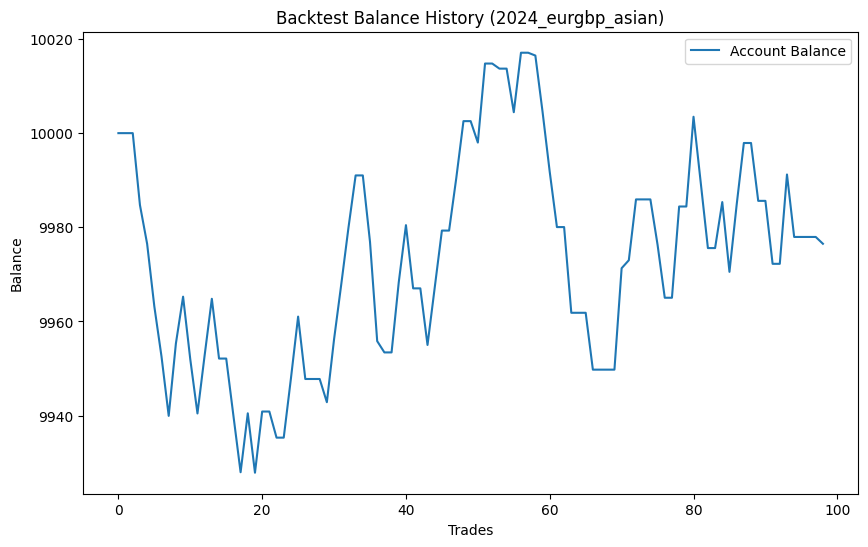

In [3]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "asian"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 245
{'Accuracy': 0.5, 'Confusion Matrix': array([[55,  1],
       [58,  4]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.49      0.98      0.65        56\n           1       0.80      0.06      0.12        62\n\n    accuracy                           0.50       118\n   macro avg       0.64      0.52      0.39       118\nweighted avg       0.65      0.50      0.37       118\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 179
     tick                   datetime  renko_price  actual_open_price  \
0     493  2024-10-24

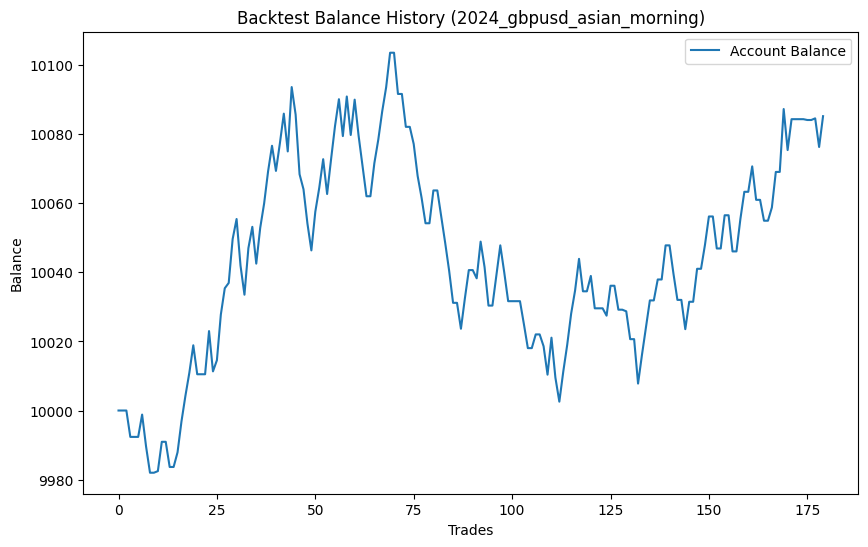

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 230
{'Accuracy': 0.5108695652173914, 'Confusion Matrix': array([[14, 43],
       [ 2, 33]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.88      0.25      0.38        57\n           1       0.43      0.94      0.59        35\n\n    accuracy                           0.51        92\n   macro avg       0.65      0.59      0.49        92\nweighted avg       0.71      0.51      0.46        92\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 163
     tick                   datetime  renko_price  actual_open_price  \
0     

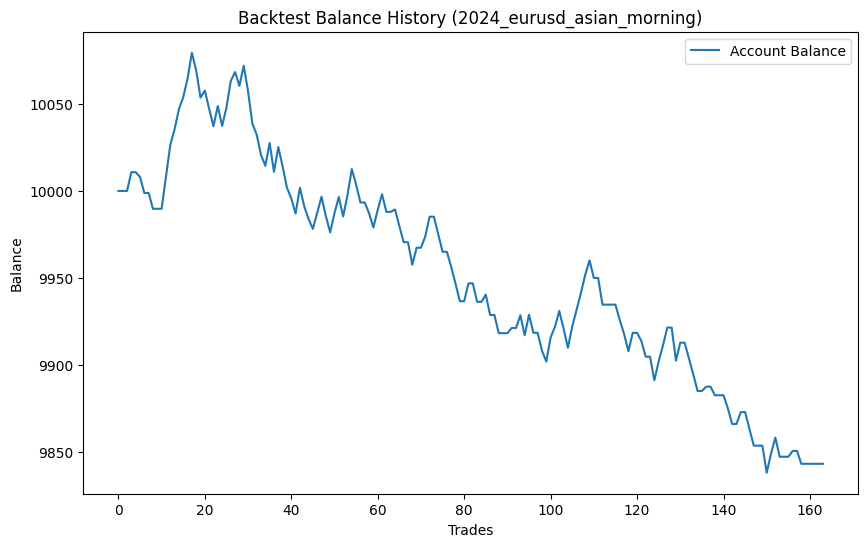

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 249
{'Accuracy': 0.503731343283582, 'Confusion Matrix': array([[ 21, 110],
       [ 23, 114]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.48      0.16      0.24       131\n           1       0.51      0.83      0.63       137\n\n    accuracy                           0.50       268\n   macro avg       0.49      0.50      0.44       268\nweighted avg       0.49      0.50      0.44       268\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 264
     tick                   datetime  renko_price  actual_open_price  \
0  

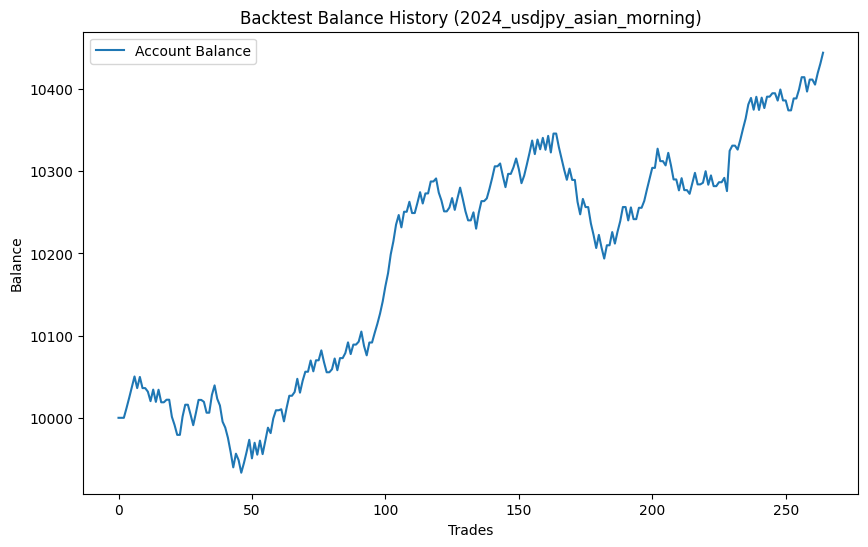

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 143
{'Accuracy': 0.42857142857142855, 'Confusion Matrix': array([[ 4, 28],
       [ 0, 17]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.12      0.22        32\n           1       0.38      1.00      0.55        17\n\n    accuracy                           0.43        49\n   macro avg       0.69      0.56      0.39        49\nweighted avg       0.78      0.43      0.34        49\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 39
    tick                  datetime  renko_price  actual_open_price  predicted 

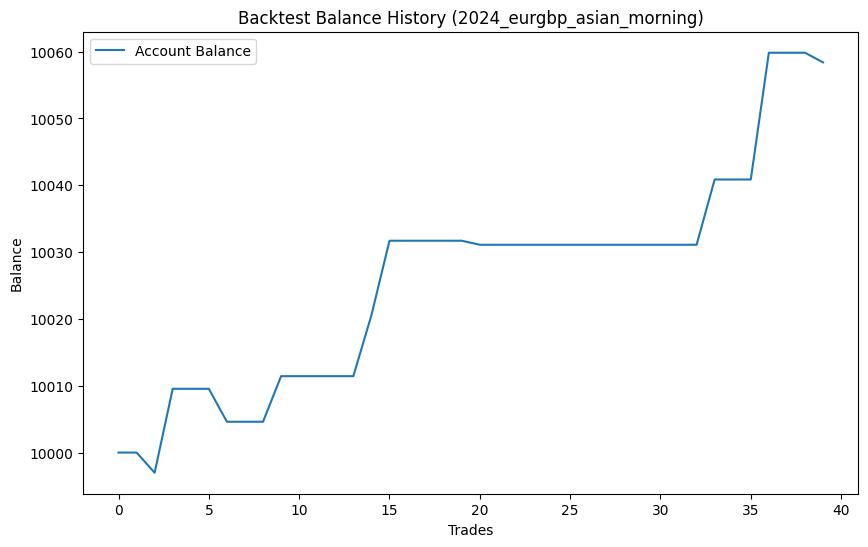

In [4]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "asian_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 258
{'Accuracy': 0.49808429118773945, 'Confusion Matrix': array([[352,  28],
       [365,  38]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.49      0.93      0.64       380\n           1       0.58      0.09      0.16       403\n\n    accuracy                           0.50       783\n   macro avg       0.53      0.51      0.40       783\nweighted avg       0.53      0.50      0.39       783\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 888
     tick                   datetime  renko_price  actual_open_price  \
0

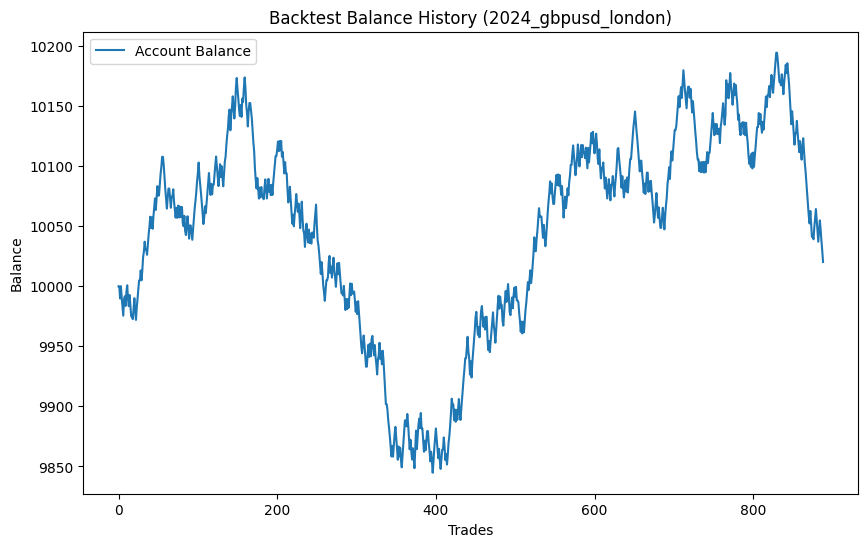

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 257
{'Accuracy': 0.4863013698630137, 'Confusion Matrix': array([[142,  85],
       [140,  71]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.50      0.63      0.56       227\n           1       0.46      0.34      0.39       211\n\n    accuracy                           0.49       438\n   macro avg       0.48      0.48      0.47       438\nweighted avg       0.48      0.49      0.48       438\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 684
     tick                   datetime  renko_price  actual_open_price  \
0 

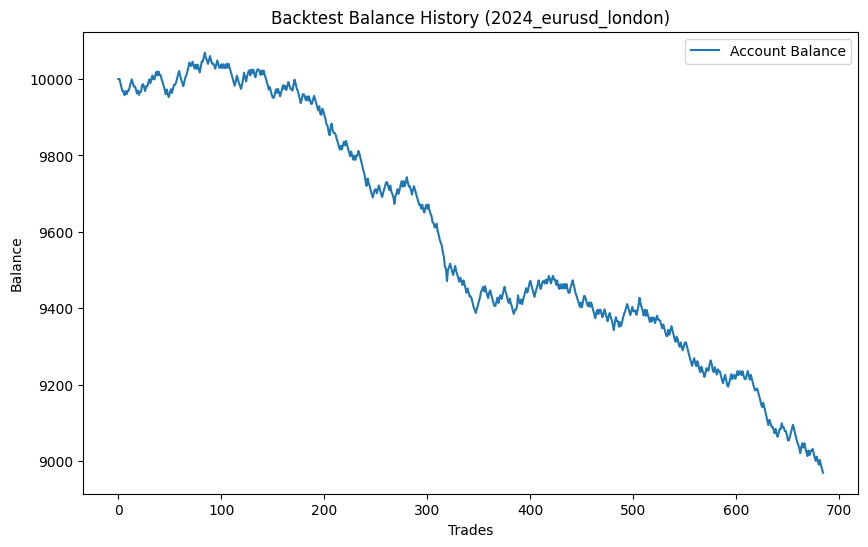

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 248
{'Accuracy': 0.53584229390681, 'Confusion Matrix': array([[114, 148],
       [111, 185]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.51      0.44      0.47       262\n           1       0.56      0.62      0.59       296\n\n    accuracy                           0.54       558\n   macro avg       0.53      0.53      0.53       558\nweighted avg       0.53      0.54      0.53       558\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 449
     tick                   datetime  renko_price  actual_open_price  \
0   

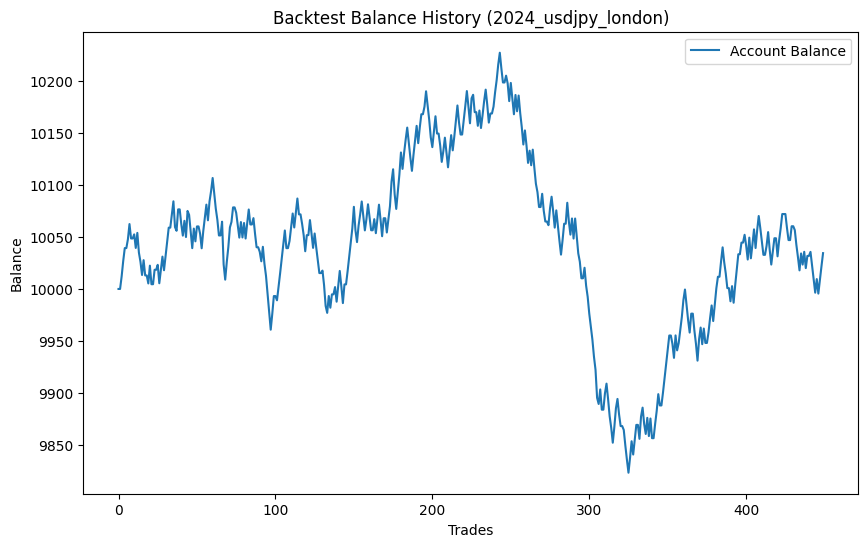

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 231
{'Accuracy': 0.5030674846625767, 'Confusion Matrix': array([[25, 69],
       [12, 57]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.68      0.27      0.38        94\n           1       0.45      0.83      0.58        69\n\n    accuracy                           0.50       163\n   macro avg       0.56      0.55      0.48       163\nweighted avg       0.58      0.50      0.47       163\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 221
     tick                   datetime  renko_price  actual_open_price  \
0     

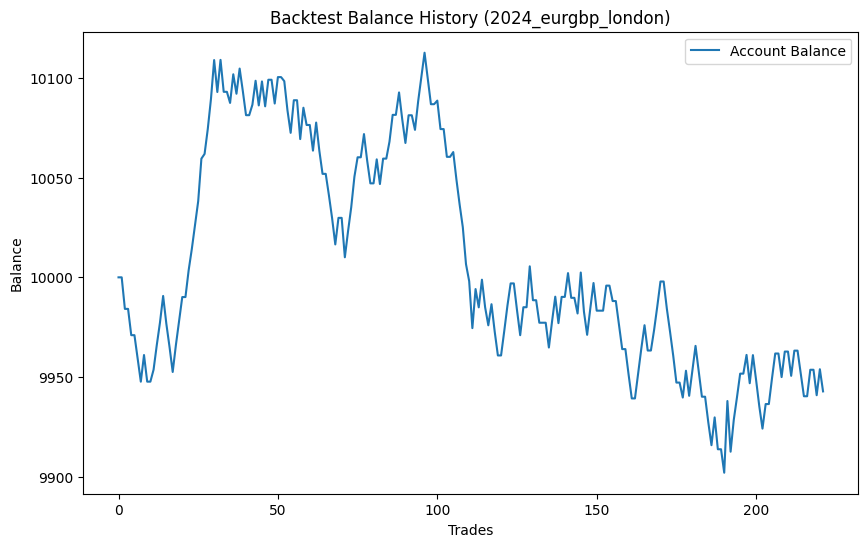

In [5]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 251
{'Accuracy': 0.48188405797101447, 'Confusion Matrix': array([[119,  10],
       [133,  14]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.47      0.92      0.62       129\n           1       0.58      0.10      0.16       147\n\n    accuracy                           0.48       276\n   macro avg       0.53      0.51      0.39       276\nweighted avg       0.53      0.48      0.38       276\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 324
     tick                   datetime  renko_price  actual_open_price  \
0

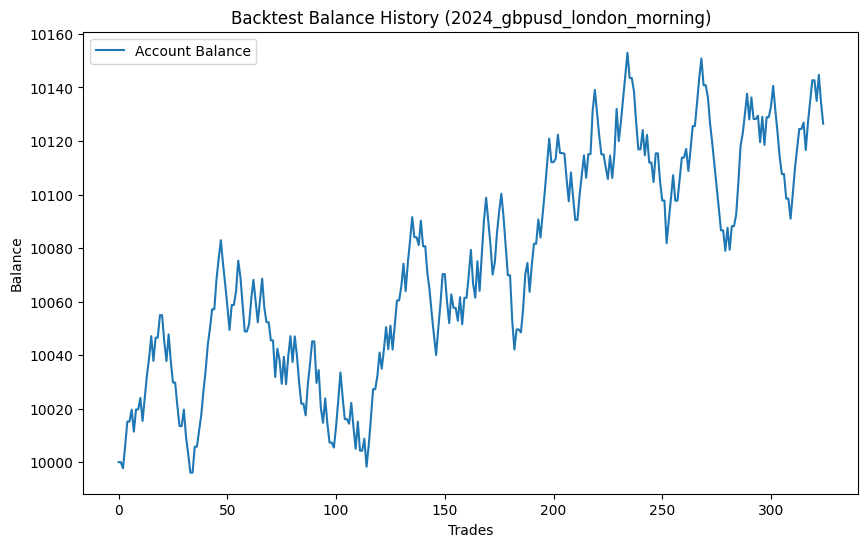

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 242
{'Accuracy': 0.46835443037974683, 'Confusion Matrix': array([[62, 24],
       [60, 12]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.51      0.72      0.60        86\n           1       0.33      0.17      0.22        72\n\n    accuracy                           0.47       158\n   macro avg       0.42      0.44      0.41       158\nweighted avg       0.43      0.47      0.43       158\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 266
     tick                   datetime  renko_price  actual_open_price  \
0    

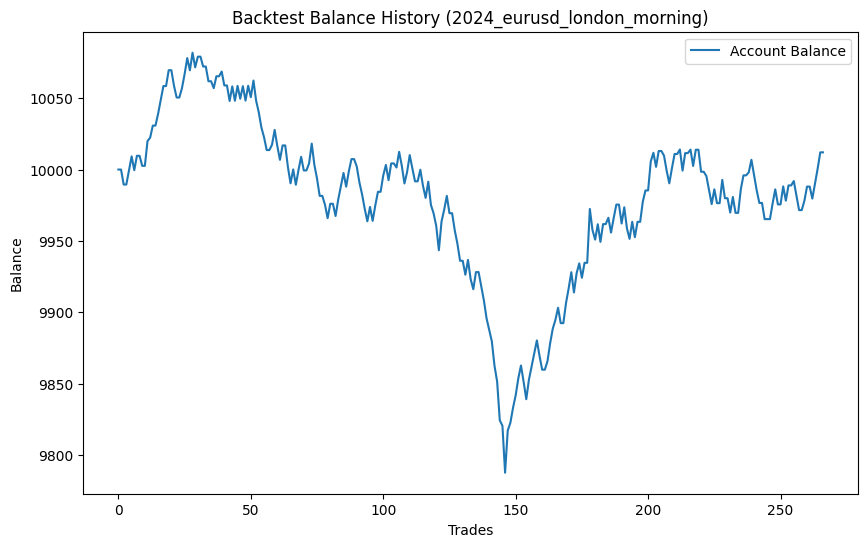

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 223
{'Accuracy': 0.5771144278606966, 'Confusion Matrix': array([[36, 47],
       [38, 80]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.49      0.43      0.46        83\n           1       0.63      0.68      0.65       118\n\n    accuracy                           0.58       201\n   macro avg       0.56      0.56      0.56       201\nweighted avg       0.57      0.58      0.57       201\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 181
     tick                   datetime  renko_price  actual_open_price  \
0     

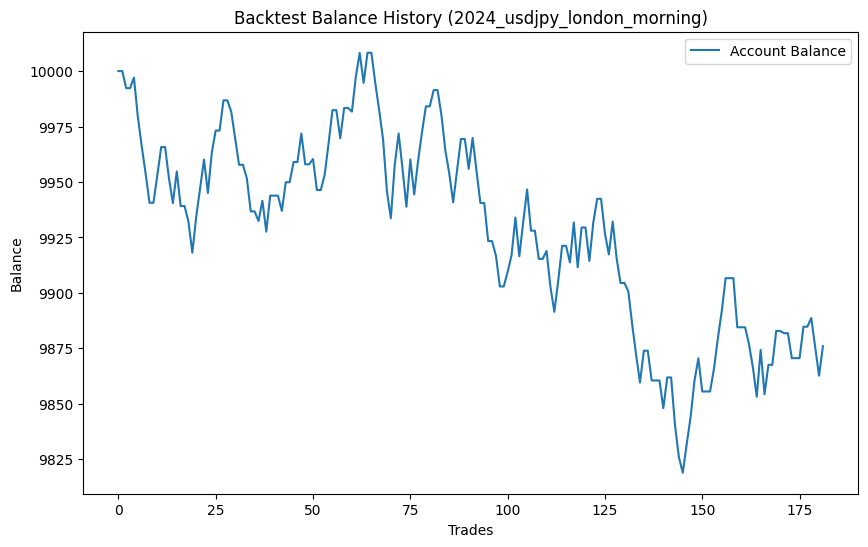

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 195
{'Accuracy': 0.42857142857142855, 'Confusion Matrix': array([[ 0, 41],
       [ 3, 33]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        41\n           1       0.45      0.92      0.60        36\n\n    accuracy                           0.43        77\n   macro avg       0.22      0.46      0.30        77\nweighted avg       0.21      0.43      0.28        77\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 101
     tick                   datetime  renko_price  actual_open_price  \
0    

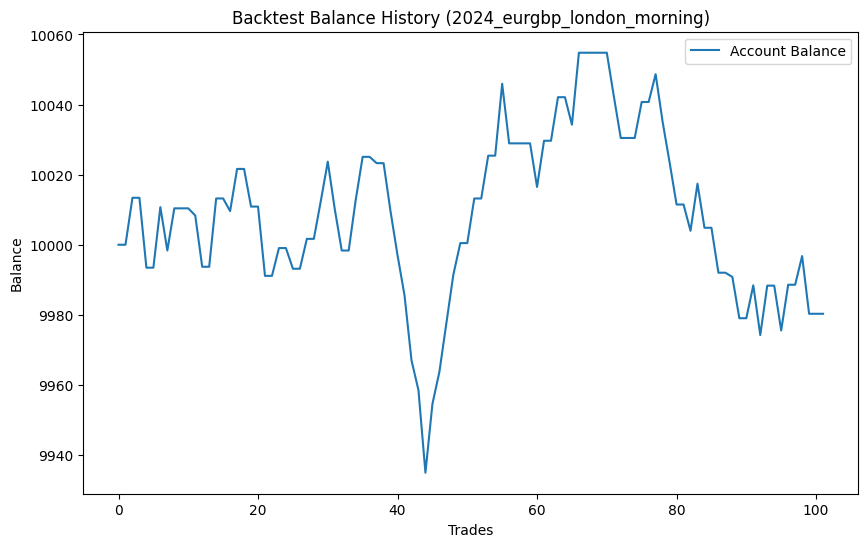

In [6]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 256
{'Accuracy': 0.47653429602888087, 'Confusion Matrix': array([[253,   9],
       [281,  11]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.47      0.97      0.64       262\n           1       0.55      0.04      0.07       292\n\n    accuracy                           0.48       554\n   macro avg       0.51      0.50      0.35       554\nweighted avg       0.51      0.48      0.34       554\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 596
     tick                   datetime  renko_price  actual_open_price  \
0

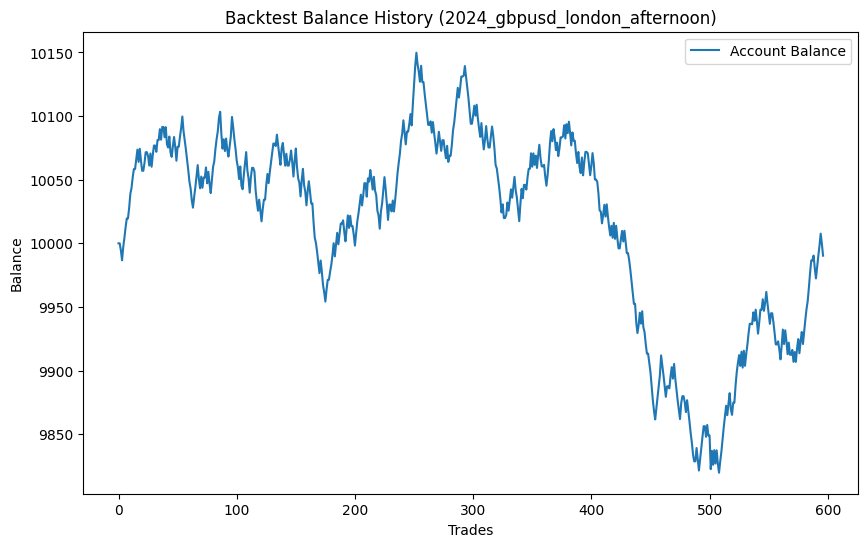

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 251
{'Accuracy': 0.5232198142414861, 'Confusion Matrix': array([[160,   8],
       [146,   9]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.95      0.68       168\n           1       0.53      0.06      0.10       155\n\n    accuracy                           0.52       323\n   macro avg       0.53      0.51      0.39       323\nweighted avg       0.53      0.52      0.40       323\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 438
     tick                   datetime  renko_price  actual_open_price  \
0 

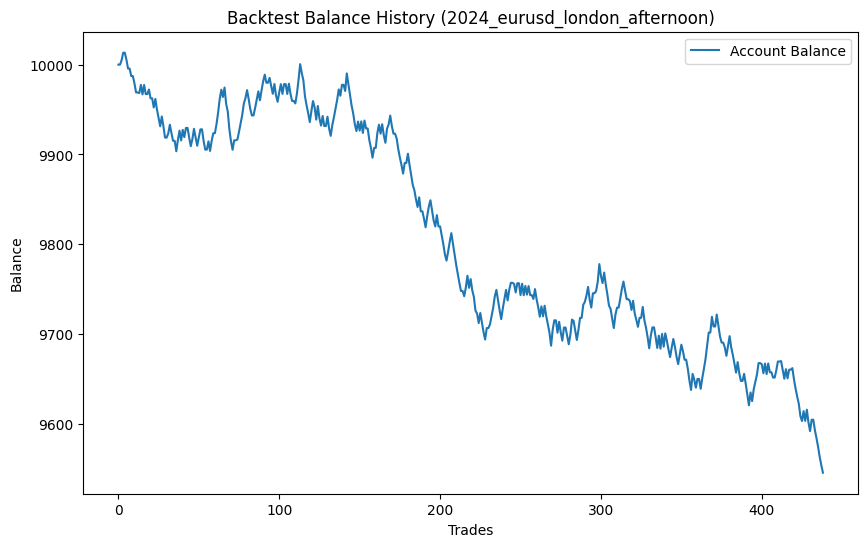

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 241
{'Accuracy': 0.5365239294710328, 'Confusion Matrix': array([[ 55, 135],
       [ 49, 158]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.53      0.29      0.37       190\n           1       0.54      0.76      0.63       207\n\n    accuracy                           0.54       397\n   macro avg       0.53      0.53      0.50       397\nweighted avg       0.53      0.54      0.51       397\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 337
     tick                   datetime  renko_price  actual_open_price  \
0 

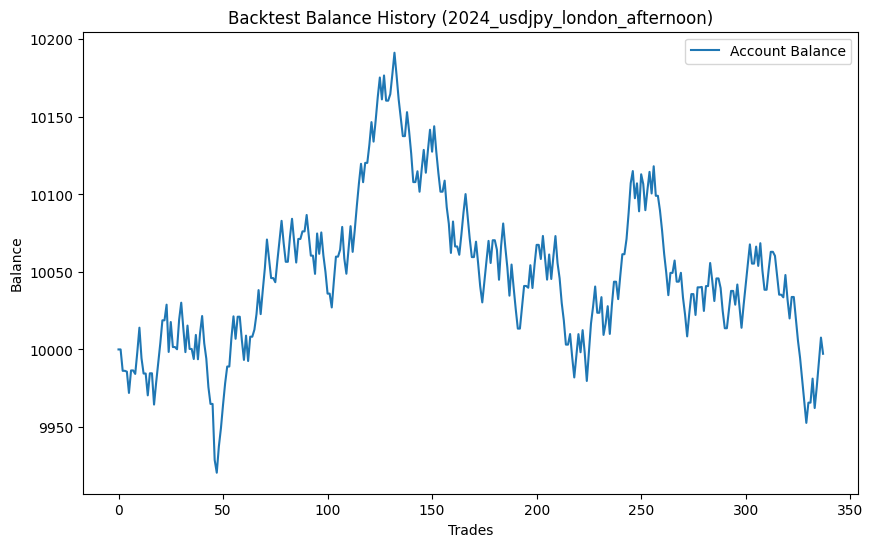

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 214
{'Accuracy': 0.46551724137931033, 'Confusion Matrix': array([[13, 57],
       [ 5, 41]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.72      0.19      0.30        70\n           1       0.42      0.89      0.57        46\n\n    accuracy                           0.47       116\n   macro avg       0.57      0.54      0.43       116\nweighted avg       0.60      0.47      0.40       116\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 150
     tick                   datetime  renko_price  actual_open_price  \
0    

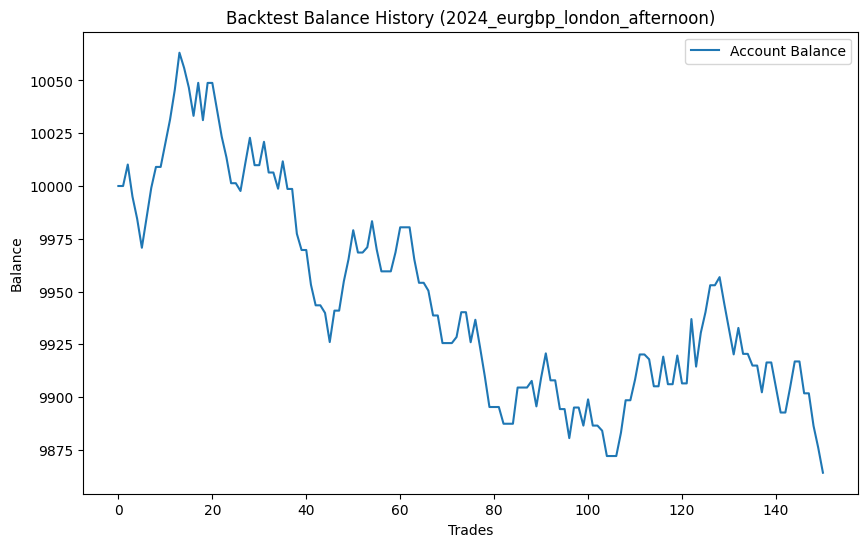

In [7]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "london_afternoon"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 257
{'Accuracy': 0.49846625766871167, 'Confusion Matrix': array([[306,   7],
       [320,  19]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.49      0.98      0.65       313\n           1       0.73      0.06      0.10       339\n\n    accuracy                           0.50       652\n   macro avg       0.61      0.52      0.38       652\nweighted avg       0.61      0.50      0.37       652\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 744
     tick                   datetime  renko_price  actual_open_price  \
0

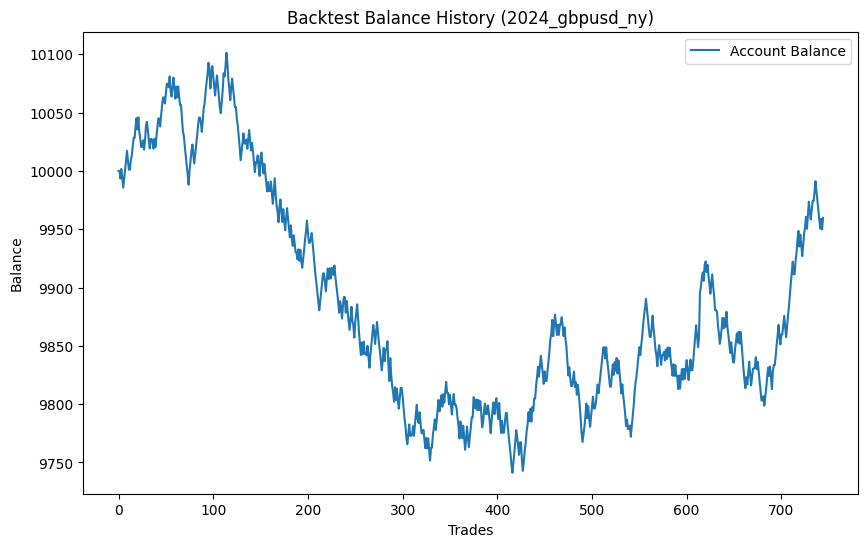

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 256
{'Accuracy': 0.4867469879518072, 'Confusion Matrix': array([[139,  71],
       [142,  63]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.49      0.66      0.57       210\n           1       0.47      0.31      0.37       205\n\n    accuracy                           0.49       415\n   macro avg       0.48      0.48      0.47       415\nweighted avg       0.48      0.49      0.47       415\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 586
     tick                   datetime  renko_price  actual_open_price  \
0 

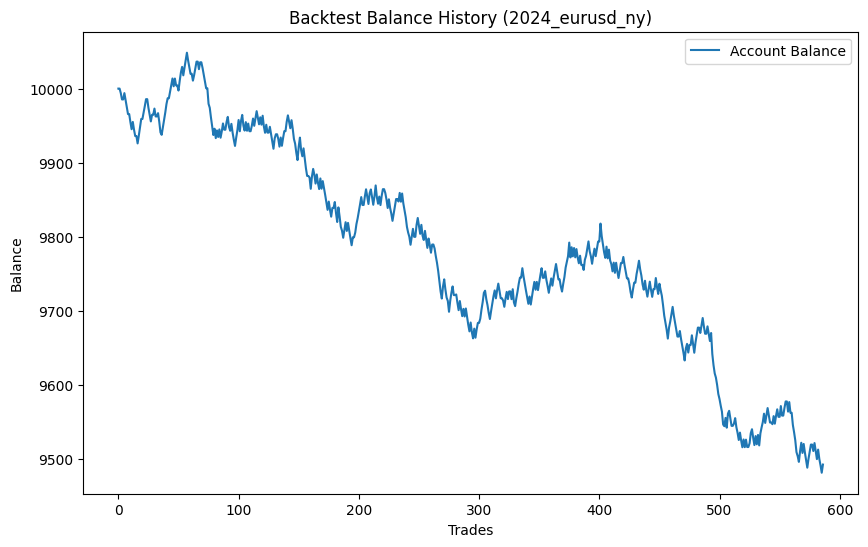

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 249
{'Accuracy': 0.5405405405405406, 'Confusion Matrix': array([[ 71, 161],
       [ 60, 189]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.54      0.31      0.39       232\n           1       0.54      0.76      0.63       249\n\n    accuracy                           0.54       481\n   macro avg       0.54      0.53      0.51       481\nweighted avg       0.54      0.54      0.52       481\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 367
     tick                   datetime  renko_price  actual_open_price  \
0 

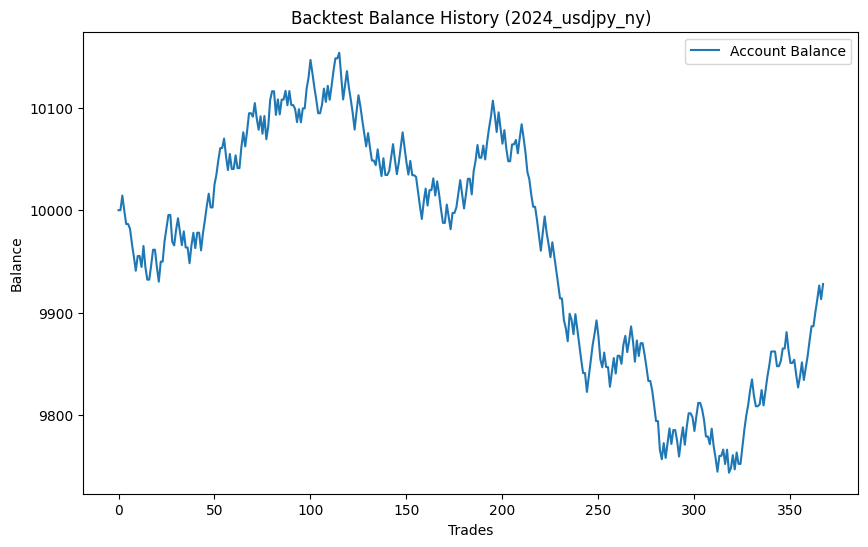

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 222
{'Accuracy': 0.4435483870967742, 'Confusion Matrix': array([[11, 61],
       [ 8, 44]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.58      0.15      0.24        72\n           1       0.42      0.85      0.56        52\n\n    accuracy                           0.44       124\n   macro avg       0.50      0.50      0.40       124\nweighted avg       0.51      0.44      0.38       124\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 174
     tick                   datetime  renko_price  actual_open_price  \
0     

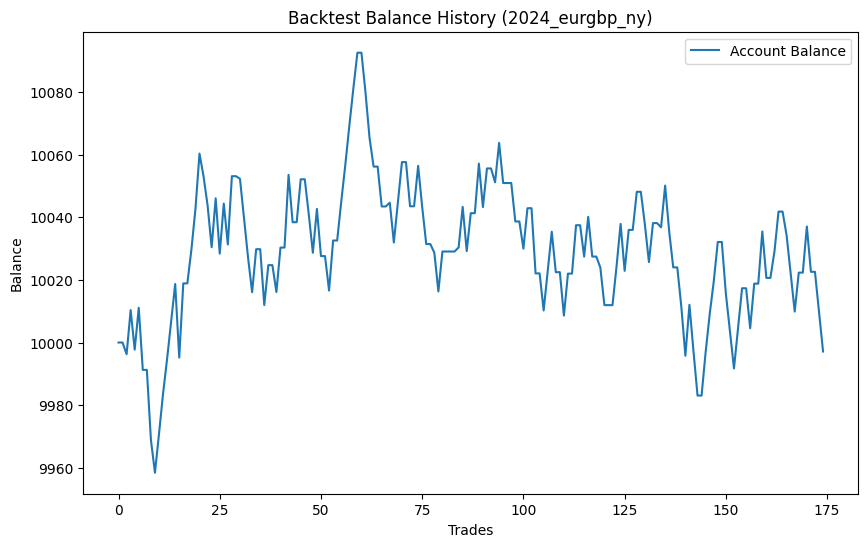

In [8]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 255
{'Accuracy': 0.4946695095948827, 'Confusion Matrix': array([[221,   4],
       [233,  11]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.49      0.98      0.65       225\n           1       0.73      0.05      0.08       244\n\n    accuracy                           0.49       469\n   macro avg       0.61      0.51      0.37       469\nweighted avg       0.62      0.49      0.36       469\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 525
     tick                   datetime  renko_price  actual_open_price  \
0 

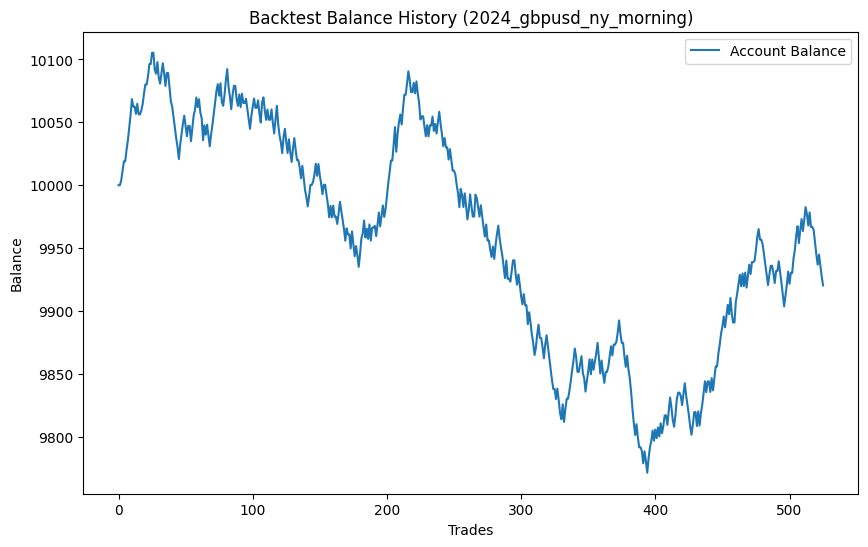

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 252
{'Accuracy': 0.5185185185185185, 'Confusion Matrix': array([[139,  15],
       [128,  15]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.90      0.66       154\n           1       0.50      0.10      0.17       143\n\n    accuracy                           0.52       297\n   macro avg       0.51      0.50      0.42       297\nweighted avg       0.51      0.52      0.43       297\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 412
     tick                   datetime  renko_price  actual_open_price  \
0 

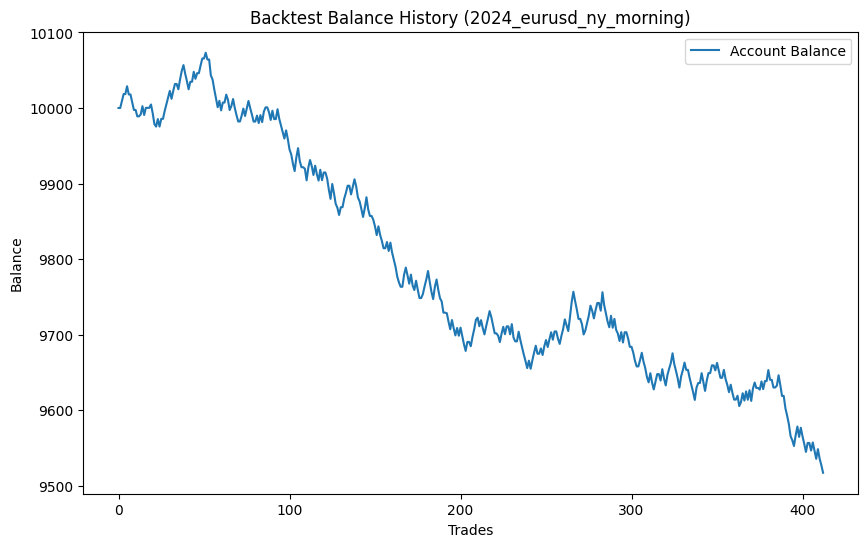

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 244
{'Accuracy': 0.5352112676056338, 'Confusion Matrix': array([[ 62, 107],
       [ 58, 128]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.52      0.37      0.43       169\n           1       0.54      0.69      0.61       186\n\n    accuracy                           0.54       355\n   macro avg       0.53      0.53      0.52       355\nweighted avg       0.53      0.54      0.52       355\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 275
     tick                   datetime  renko_price  actual_open_price  \
0 

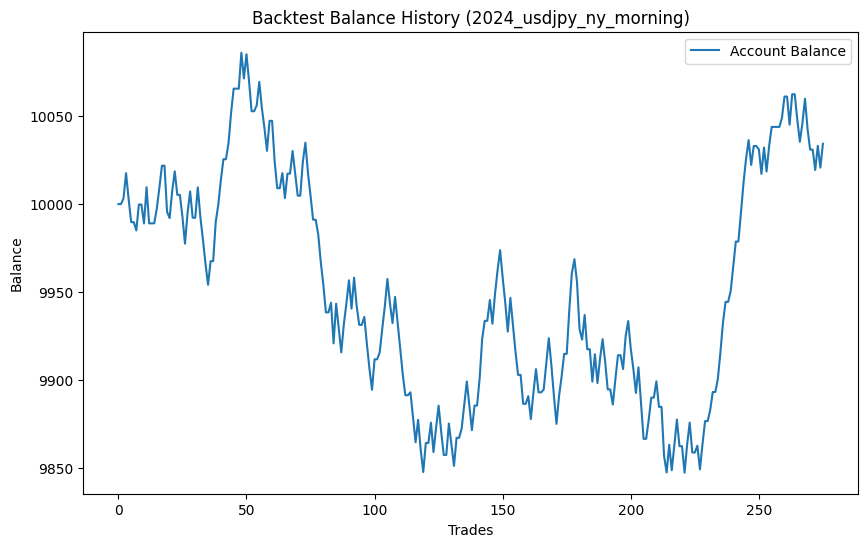

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 206
{'Accuracy': 0.5192307692307693, 'Confusion Matrix': array([[10, 46],
       [ 4, 44]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.71      0.18      0.29        56\n           1       0.49      0.92      0.64        48\n\n    accuracy                           0.52       104\n   macro avg       0.60      0.55      0.46       104\nweighted avg       0.61      0.52      0.45       104\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 123
     tick                   datetime  renko_price  actual_open_price  \
0     

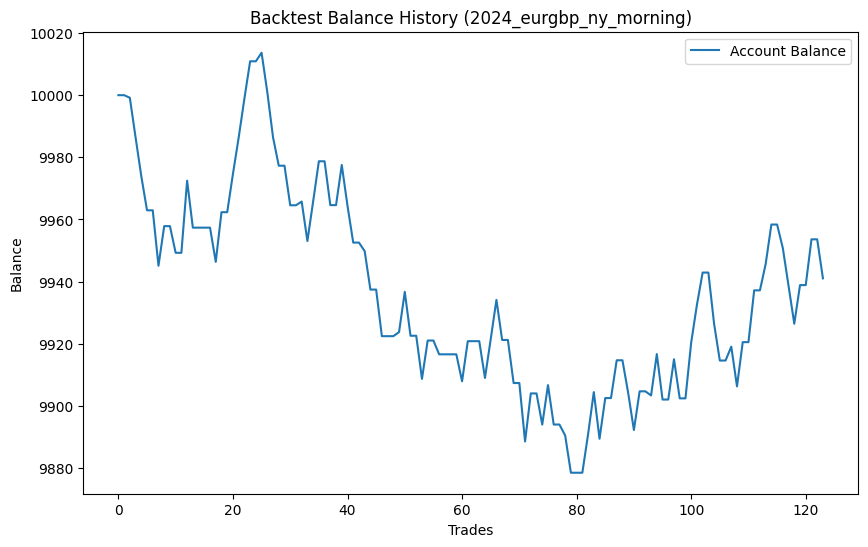

In [9]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny_morning"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 247
{'Accuracy': 0.4658119658119658, 'Confusion Matrix': array([[108,   0],
       [125,   1]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.46      1.00      0.63       108\n           1       1.00      0.01      0.02       126\n\n    accuracy                           0.47       234\n   macro avg       0.73      0.50      0.32       234\nweighted avg       0.75      0.47      0.30       234\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 254
     tick                   datetime  renko_price  actual_open_price  \
0 

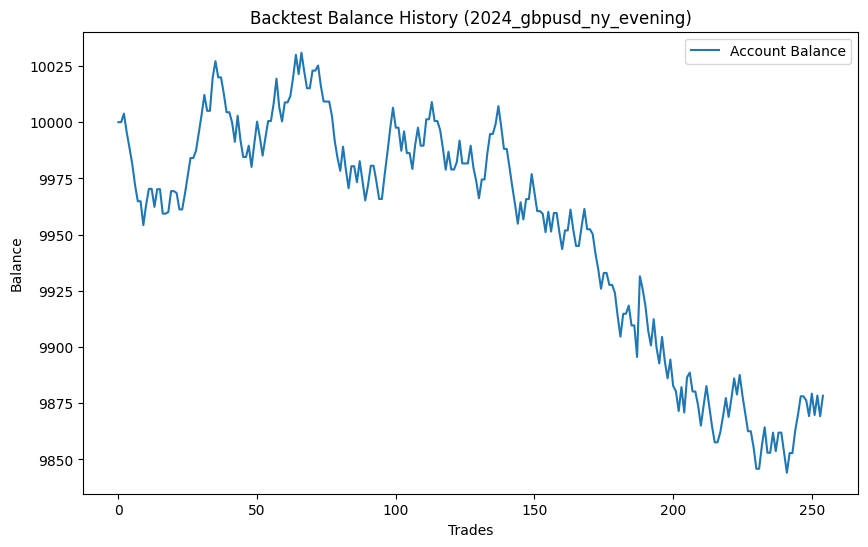

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 225
{'Accuracy': 0.5033557046979866, 'Confusion Matrix': array([[26, 59],
       [15, 49]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.63      0.31      0.41        85\n           1       0.45      0.77      0.57        64\n\n    accuracy                           0.50       149\n   macro avg       0.54      0.54      0.49       149\nweighted avg       0.56      0.50      0.48       149\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 197
     tick                   datetime  renko_price  actual_open_price  \
0     

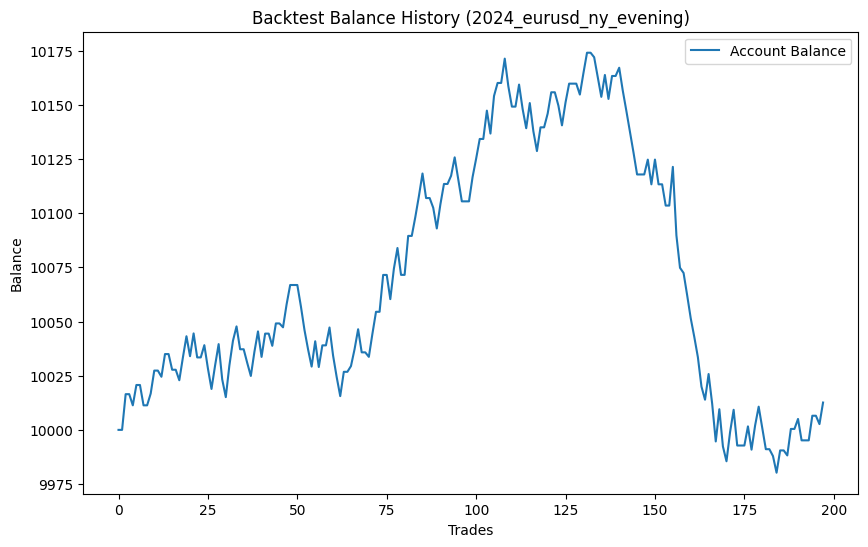

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 217
{'Accuracy': 0.5743243243243243, 'Confusion Matrix': array([[21, 42],
       [21, 64]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.50      0.33      0.40        63\n           1       0.60      0.75      0.67        85\n\n    accuracy                           0.57       148\n   macro avg       0.55      0.54      0.54       148\nweighted avg       0.56      0.57      0.56       148\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 134
     tick                   datetime  renko_price  actual_open_price  \
0     

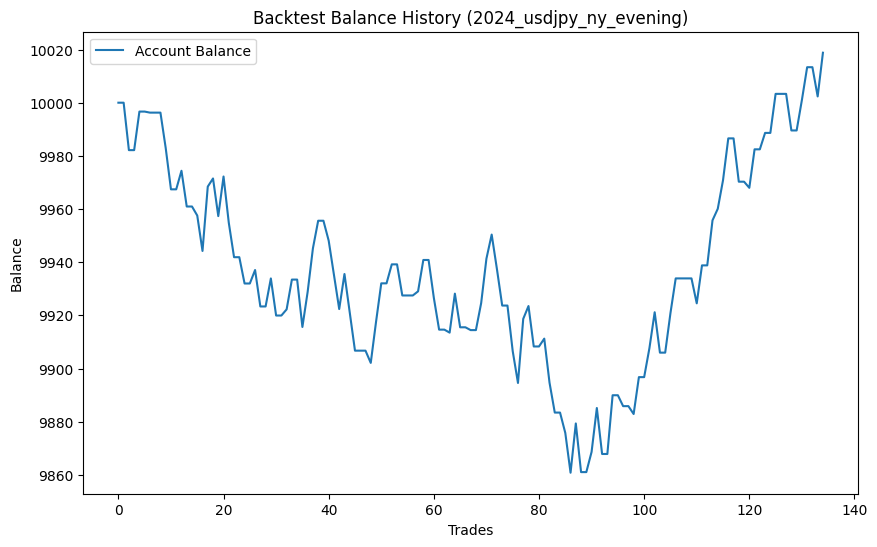

c:\Users\mmori\Documents\fx_strategy_project\src\models\random_forest.py:167: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['datetime'] = pd.to_datetime(df['datetime'], errors='raise')


Unique session days: 161
{'Accuracy': 0.46551724137931033, 'Confusion Matrix': array([[ 3, 29],
       [ 2, 24]]), 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.60      0.09      0.16        32\n           1       0.45      0.92      0.61        26\n\n    accuracy                           0.47        58\n   macro avg       0.53      0.51      0.38        58\nweighted avg       0.53      0.47      0.36        58\n'}
Model output saved to c:\Users\mmori\Documents\fx_strategy_project\notebooks\output\model\random_forest
Index(['tick_number', 'renko_price', 'actual_openprice', 'ticks_moved',
       'directions', 'day_of_week', 'datetime_original', 'lag_1', 'lag_2',
       'lag_3', 'ticks_moved_lag_1', 'ma_10', 'max_5', 'min_5',
       'distance_from_ma10', 'sign_of_distance', 'mk_stat_50', 'target',
       'date'],
      dtype='object')
Test set size: 47
    tick                  datetime  renko_price  actual_open_price  predicted 

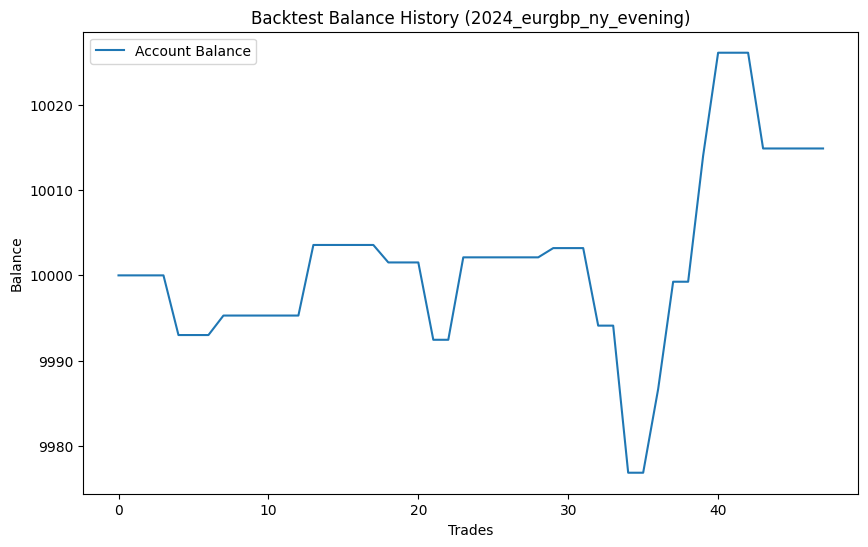

In [10]:
year = "2024"
ccys = ["gbpusd", "eurusd", "usdjpy", "eurgbp"]
session = "ny_evening"
base_price = "prev"

for ccy in ccys:
    file_path = rf'{input_file_path}/{year}_{ccy}_{session}_tick_first_price_as_base.csv'
    # Load the dataset
    df = pd.read_csv(file_path)
    backtest_data, X_backtest, y_backtest, y_pred_backtest = random_forest_session(df, year, ccy, session, model_output_filepath)
    balance_history, trade_log = run_backtest(model_output_filepath, year, ccy, session, backtest_data, X_backtest, y_backtest, y_pred_backtest)